# **PART 1: Explore the data**

Importing libraries

In [141]:
import pandas as pd

# **PRODUCTS dataset**

Data Quality Issues (explained below using code):
- Null Values for all columns need to be imputed
- Barcode should ideally have a string datatype not float
- 215 Duplicate rows need to be deleted
- Producs having at least 5 out of 7 fields missing should be deleted
- Some of missing Manufacturer and Brand names can be imputed using Regex expressions between each other to some extent, if similar
- there are 185 non-null duplicated barcodes


1. Checking first 5 rows and shape of dataframe

In [142]:
df_products = pd.read_csv('PRODUCTS_TAKEHOME.csv')
df_products.head()

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11


In [143]:
df_products.shape

(845552, 7)

2. Checking count of null values in each column and datatypes

In [144]:
df_products.isnull().sum()

,0
CATEGORY_1,111
CATEGORY_2,1424
CATEGORY_3,60566
CATEGORY_4,778093
MANUFACTURER,226474
BRAND,226472
BARCODE,4025


2.1 Number of Prducts have at least 5 fileds missing

In [145]:
df_products[df_products.isnull().sum(axis=1)>=5].shape[0]

36

In [147]:
df_products.dtypes

,0
CATEGORY_1,object
CATEGORY_2,object
CATEGORY_3,object
CATEGORY_4,object
MANUFACTURER,object
BRAND,object
BARCODE,float64


3. How does the data look like without null values: seems Category 1 is the broader category then category 4 is the most specific one

In [148]:
df_products[~df_products['CATEGORY_4'].isna()].head(5)

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
15,Health & Wellness,Hair Care,Hair Tools,Hair Brushes & Combs,PLACEHOLDER MANUFACTURER,BULK BUYS,7.310151e+11
25,Health & Wellness,Hair Removal,Shaving Gel & Cream,Women's Shaving Gel & Cream,PLACEHOLDER MANUFACTURER,WAHL,4.391710e+10
31,Health & Wellness,Skin Care,Lip Balms & Treatments,Lip Balms,THE CLOROX COMPANY,BURT'S BEES BEAUTY,7.928507e+11
39,Snacks,Puffed Snacks,Popcorn,Already Popped Popcorn,STONEHEDGE FARMS INC,STONEHEDGE FARMS,4.576433e+10
44,Health & Wellness,Hair Removal,Shaving Gel & Cream,Women's Shaving Gel & Cream,CONAIR LLC,CONAIR,1.915662e+11


4. Types products for each type of category, unique manufacturers, unique brands

In [149]:
(df_products['CATEGORY_1'].nunique(), df_products['CATEGORY_2'].nunique(), df_products['CATEGORY_3'].nunique(),df_products['CATEGORY_4'].nunique())

(27, 121, 344, 127)

In [150]:
(df_products['MANUFACTURER'].nunique(), df_products['BRAND'].nunique())

(4354, 8122)

5. If there are any duplcicate rows

In [151]:
df_products.duplicated().sum()

215

If there are any non-null duplicated barcodes

In [152]:
df_products[df_products['BARCODE'].duplicated()&~df_products['BARCODE'].isna()].shape[0]

185

# **Transaction dataset**

Data Quality issues (explained in code below):
- data type of Purchase_Date and Scan date should be date not string
- data type of barcode should be string not float
- data type of final_quantity should be integer not object
- data type of final_sale should be float not object
- need to delete 335 duplicate rows
- 2 transactions have FINAL_QUANTITY value of 276, which are likely outliers (assuming if quantity is greater than 20, means an outlier)
-there is some value for FINAL_SALE even when the FINAL_QUANTITY is 0

Insights:
- there are about 25,000 unique receipts in a dataset of 50,000 rows, so 1 receipt is tied to multiple transactions. Are those refunds/exchanges?
- there are about 17,000 unique users are making at leat 1 transaction
- 12,000 unique users with each having only 1 receipt (so should be good customers, assuming no refunds)
- About 5000 users are repeat customers (each having at least 2 unique receipts)
- Should investigate the receipts having more than 5 transactions

1. Checking first 5 rows and shape of dataframe

In [153]:
df_transaction = pd.read_csv('TRANSACTION_TAKEHOME.csv')
df_transaction.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,


In [154]:
df_transaction.shape

(50000, 8)

2. Checking count of null values in each column and datatypes

In [155]:
df_transaction.isnull().sum()

,0
RECEIPT_ID,0
PURCHASE_DATE,0
SCAN_DATE,0
STORE_NAME,0
USER_ID,0
BARCODE,5762
FINAL_QUANTITY,0
FINAL_SALE,0


In [156]:
df_transaction.dtypes

,0
RECEIPT_ID,object
PURCHASE_DATE,object
SCAN_DATE,object
STORE_NAME,object
USER_ID,object
BARCODE,float64
FINAL_QUANTITY,object
FINAL_SALE,object


3. Checking if any duplicates

In [157]:
df_transaction.duplicated().sum()

171

4. Exploring PURCHASE_DATE

In [158]:
df_transaction['PURCHASE_DATE'] = pd.to_datetime(df_transaction['PURCHASE_DATE'], errors='coerce')
df_transaction['SCAN_DATE'] = pd.to_datetime(df_transaction['SCAN_DATE'], errors='coerce')

Transaction data is available for about 3 months: 12 June 2024 to 08 Sep 2024
for both PURCHASE_DATE and SCAN_DATE

In [159]:
df_transaction['PURCHASE_DATE'].describe()

,PURCHASE_DATE
count,50000
mean,2024-07-24 09:44:17.664000
min,2024-06-12 00:00:00
25%,2024-07-03 00:00:00
50%,2024-07-24 00:00:00
75%,2024-08-15 00:00:00
max,2024-09-08 00:00:00


Looks pretty much same number of transactions everyday, but declined by 20% in last 10 days. (SCAN_DATE has similar distribution too)

<Axes: >

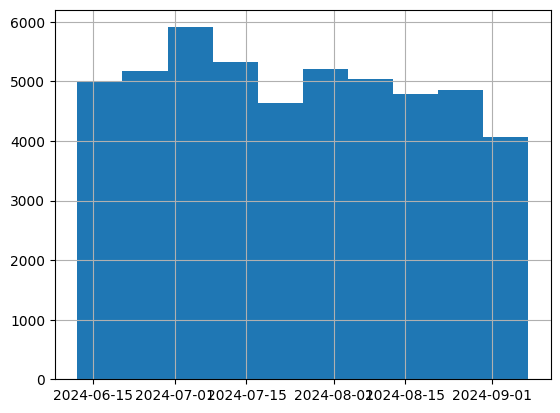

In [160]:
df_transaction['PURCHASE_DATE'].hist()

5. Exploring RECEIPT_ID

there are about 25,000 unique receipts in a dataset of 50,000 rows, so 1 receipt is tied to multiple transactions. Are those refunds/exchanges?

In [161]:
df_transaction['RECEIPT_ID'].duplicated().sum()

25560

Top 5 Receipts with most multiple transactions

In [162]:
df_transaction.groupby(['RECEIPT_ID']).size().sort_values(ascending=False).head(5)

,0
RECEIPT_ID,
bedac253-2256-461b-96af-267748e6cecf,12
bc304cd7-8353-4142-ac7f-f3ccec720cb3,8
4ec870d2-c39f-4a40-bf8a-26a079409b20,8
2acd7e8d-37df-4e51-8ee5-9a9c8c1d9711,8
760c98da-5174-401f-a203-b839c4d406be,8


6. Exploring USER_ID

12,000 unique users with each having only 1 receipt

In [163]:
user_receipt_counts = df_transaction.groupby('USER_ID')['RECEIPT_ID'].nunique()
user_receipt_counts[user_receipt_counts == 1].shape[0]

12735

About 5000 users are repeat customers (each having at least 2 unique receipts)

In [164]:
user_receipt_counts = df_transaction.groupby('USER_ID')['RECEIPT_ID'].nunique()
user_receipt_counts[user_receipt_counts >= 2].shape[0]

4959

7. Exploring FINAL_QUANTITY

keeping the appropriate data type

In [165]:
df_transaction['FINAL_QUANTITY'] = pd.to_numeric(df_transaction['FINAL_QUANTITY'], errors='coerce').fillna(0)
df_transaction['FINAL_SALE'] = pd.to_numeric(df_transaction['FINAL_SALE'], errors='coerce').fillna(0)

In [166]:
df_transaction.head(3)

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539000+00:00,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.0,0.00
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206000+00:00,ALDI,62c08877baa38d1a1f6c211a,NaN,0.0,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813000+00:00,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.0,0.00


Checking distribution of FINAL_QUANTITY

<Axes: >

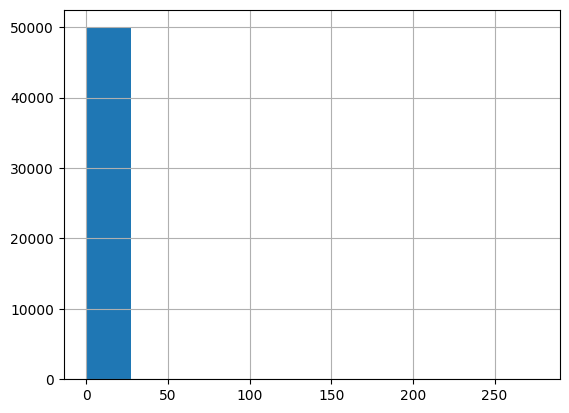

In [167]:
df_transaction['FINAL_QUANTITY'].hist()

20 or more quantities are likely outliers

In [168]:
df_transaction[df_transaction['FINAL_QUANTITY']<=20]

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539000+00:00,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.0,0.00
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206000+00:00,ALDI,62c08877baa38d1a1f6c211a,NaN,0.0,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813000+00:00,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.0,0.00
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468000+00:00,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,0.0,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549000+00:00,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.0,0.00
...,...,...,...,...,...,...,...,...
49995,b5cd61a9-8033-4913-a5c4-fb3f65e3a321,2024-08-21,2024-08-31 14:13:08.634000+00:00,TARGET,6154bcf098f885648de2f299,8.523911e+10,2.0,1.18
49996,e1b2f634-c9ad-4152-b662-4b22efc25862,2024-08-11,2024-08-11 18:15:56.736000+00:00,STOP & SHOP,60aa809f188b926b2244c974,4.610040e+10,1.0,2.00
49997,b07ef8dd-e444-40a2-819b-f74a3e5f1ae7,2024-07-11,2024-07-11 08:03:25.816000+00:00,WALMART,60bd26e83dc3b13a15c5f4e7,6.466300e+11,1.0,20.96
49998,42475141-bef4-4df2-aa37-72577e2512bb,2024-06-18,2024-06-18 19:57:32.211000+00:00,MARKET BASKET,6169912fac47744405af62b7,4.180050e+10,1.0,3.00


Dropping them

In [169]:
df_transaction = df_transaction[df_transaction['FINAL_QUANTITY'] <= 20]

8. Checking distribution of FINAL_SALE

-there is some value for FINAL_SALE even when the FINAL_QUANTITY is 0

In [170]:
df_transaction[df_transaction['FINAL_QUANTITY'] == 0].head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206000+00:00,ALDI,62c08877baa38d1a1f6c211a,NaN,0.0,1.49
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468000+00:00,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,0.0,3.49
5,0002d8cd-1701-4cdd-a524-b70402e2dbc0,2024-06-24,2024-06-24 19:44:54.247000+00:00,WALMART,5dcc6c510040a012b8e76924,6.811314e+11,0.0,1.46
7,00096c49-8b04-42f9-88ce-941c5e06c4a7,2024-08-19,2024-08-21 17:35:21.902000+00:00,TARGET,6144f4f1f3ef696919f54b5c,7.830007e+10,0.0,3.59
9,0010d87d-1ad2-4e5e-9a25-cec736919d15,2024-08-04,2024-08-04 18:01:47.787000+00:00,ALDI,66686fc2e04f743a096ea808,NaN,0.0,2.29


-there is some value for FINAL_SALE even when the FINAL_QUANTITY is 0

In [171]:
df_transaction[df_transaction['FINAL_SALE'] == 0].head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539000+00:00,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.0,0.0
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813000+00:00,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.0,0.0
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549000+00:00,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.0,0.0
6,000550b2-1480-4c07-950f-ff601f242152,2024-07-06,2024-07-06 19:27:48.586000+00:00,WALMART,5f850bc9cf9431165f3ac175,4.920091e+10,1.0,0.0
8,000e1d35-15e5-46c6-b6b3-33653ed3d27e,2024-08-13,2024-08-13 18:21:07.931000+00:00,WALMART,61a6d926f998e47aad33db66,5.200001e+10,1.0,0.0


# **User dataset**

Data quality issues (explained in code below):
- CREATED_DATE and BIRTH_DATE should have datetime datatype not string
- null values in BIRTH_DATE, STATE, LANGUAGE, Gender columns need to be imputed
- there are some users having age of 124, and some users having age of 2 - both likely DQ issues

1. Checking first 5 rows and shape of dataframe

In [172]:
df_user = pd.read_csv('USER_TAKEHOME.csv')
df_user.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


In [173]:
df_user.shape

(100000, 6)

2. Checking count of null values in each column and datatypes

In [174]:
df_user.isnull().sum()

,0
ID,0
CREATED_DATE,0
BIRTH_DATE,3675
STATE,4812
LANGUAGE,30508
GENDER,5892


In [175]:
df_user.dtypes

,0
ID,object
CREATED_DATE,object
BIRTH_DATE,object
STATE,object
LANGUAGE,object
GENDER,object


3. Exploring CREATED_DATE

In [176]:
df_user['CREATED_DATE'] = pd.to_datetime(df_user['CREATED_DATE'], errors='coerce')

In [177]:
df_user['CREATED_DATE'].describe()

,CREATED_DATE
count,100000
mean,2022-01-07 05:31:20.864859648+00:00
min,2014-04-18 23:14:55+00:00
25%,2020-12-01 21:16:19+00:00
50%,2022-03-07 01:03:37+00:00
75%,2023-01-30 13:47:44.500000+00:00
max,2024-09-11 17:59:15+00:00


Checking the lifetime of users with the company in years from the maximum date in the dataset.

Oldest user onboarded 10 years ago

On an average, we have users with 2 and half years of lifetime

In [178]:
df_user['user_lifetime'] = (df_user['CREATED_DATE'].max() - df_user['CREATED_DATE']).dt.days/365
df_user['user_lifetime'].describe()

,user_lifetime
count,100000.000000
mean,2.679291
std,1.548162
min,0.000000
25%,1.616438
50%,2.517808
75%,3.778082
max,10.405479


4. Exploring BIRTH_DATE



In [179]:
df_user['BIRTH_DATE'] = pd.to_datetime(df_user['BIRTH_DATE'], errors='coerce')
df_user['user_age'] = (df_user['CREATED_DATE'].max() - df_user['BIRTH_DATE']).dt.days/365
df_user['user_age'].describe()

,user_age
count,96325.000000
mean,40.052123
std,15.175996
min,2.443836
25%,26.624658
50%,38.906849
75%,50.558904
max,124.778082


Most users are in the age group 18 to 50

<Axes: >

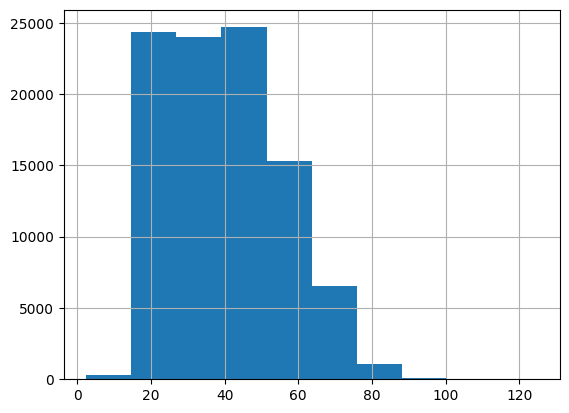

In [180]:
df_user['user_age'].hist()

5. Exploring STATE


Have users from 52 different states

In [181]:
df_user['STATE'].nunique()

52

6. Exploring Gender

68% users are female

In [182]:
100*df_user['GENDER'].value_counts()/sum(df_user['GENDER'].value_counts())

,count
GENDER,
female,68.261997
male,27.446126
transgender,1.882943
prefer_not_to_say,1.434522
non_binary,0.502614
unknown,0.208271
not_listed,0.191270
Non-Binary,0.036129
not_specified,0.029753


<Axes: ylabel='GENDER'>

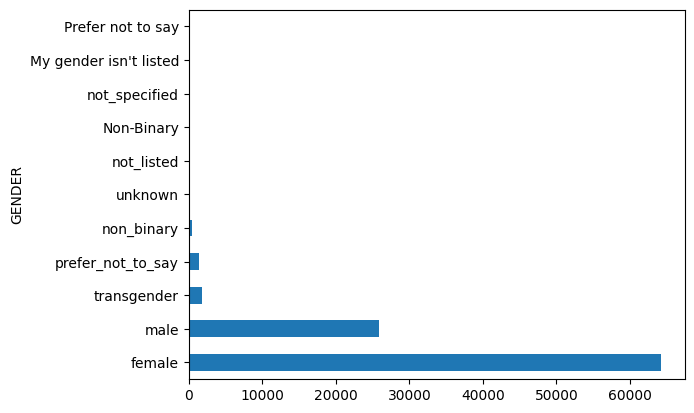

In [183]:
import matplotlib.pyplot as plt
df_user['GENDER'].value_counts().plot(kind='barh')

In [192]:
df_products['CATEGORY_2'].unique()

array(['Sexual Health', 'Puffed Snacks', 'Hair Care', 'Oral Care',
       'Medicines & Treatments', 'Deodorant & Antiperspirant',
       'Snack Bars', nan, 'Bath & Body', 'Nuts & Seeds', 'Candy',
       'Cookies', 'Variety Snack Packs', 'Hair Removal',
       'Medical Supplies & Equipment', 'Chips', 'Snack Cakes',
       'Skin Care', 'Dessert Toppings', 'Eye Care',
       'Fruit & Vegetable Snacks', 'Snack Mixes', 'Crackers',
       'Jerky & Dried Meat', 'Topical Muscle & Joint Relief Treatments',
       'Foot Care', 'First Aid', 'Ear Care', 'Menstrual Care', 'Pretzels',
       'Trail Mix', 'Dips & Salsa', 'Adult Incontinence', 'Water',
       'Cereal, Granola, & Toaster Pastries', 'Wine', 'Pudding & Gelatin',
       'Clothing', 'Carbonated Soft Drinks', 'Energy & Endurance',
       'Beverages', 'Cheese', 'Kitchen & Dining', 'Energy Drinks',
       'Packaged Vegetables', 'Household Cleaning Supplies',
       'Business & Home Security',
       'Hard Seltzers, Sodas, Waters, Lemonades & 